Precharge dimensioning
----------------------

The capacitor charging starts with an inrush current and ends with an exponential decay down to the steady state condition. When the magnitude of the inrush peak is very large compared to the maximum rating of the components, then component stress is to be expected. The current into a capacitor is known to be $I = C ( d V / d T )$: the peak inrush current will depend upon the capacitance C and the rate of change of the voltage (dV/dT). The inrush current will increase as the capacitance value increases, and the inrush current will increase as the voltage of the power source increases. This second parameter is of primary concern in high voltage power distribution systems. By their nature, high voltage power sources will deliver high voltage into the distribution system. Capacitive loads will then be subject to high inrush currents upon power-up. The stress to the components must be understood and minimized. 

This script helps selecting the correct precharge resistor depending on the battery system parameters. This script assumes that a circuit is precharged if we have reached 95% of the system voltage. This equals a time constant of $3\tau$

Three cases are calculated within this script. One case assumes the maximum current as limiting factor, a second takes the maximum precharge duration as input factor and the last one uses the precharge resistance as input. In the following variables related to the respective cases are indicated with `curReq`, `timReq` and `resReq`.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# battery system specifications
outputCapacitance_F = 0.000385 # capacitance that needs to be precharged in F
maximumBatteryVoltage_V = 823.2 # maximum battery voltage in V

# Case requirements
timReqPrechargeDuration_s = 0.3 # precharge duration in s
curReqCurrent_A = 5.0 # maximum allowed current in A
resReqPrechargeResistance_ohm = 180.0 # precharge resistance in ohm


With the required current limit and the given maximum battery voltage the minimum precharge resistance can be calculated to

$R_{Precharge}$ = $\frac{V_{Battery}}{I_{max}}$

In [ ]:
curReqPrechargeResistance_ohm = maximumBatteryVoltage_V / curReqCurrent_A

With the previously calculated precharge resistance we can calculate the precharge duration (to 95%) for this case to

$D$ = $3*\tau = 3 * R_{precharge} * outputCapacitance_F$

In [ ]:
curReqPrechargeDuration_s = 3.0 * curReqPrechargeResistance_ohm * outputCapacitance_F
resReqPrechargeDuration_s = 3.0 * resReqPrechargeResistance_ohm * outputCapacitance_F

The precharge resistance to fulfill the timing requirement is calculated to:

$\tau$ = $\frac{prechargeDuration}{3}$

In [ ]:
curReqTau_s = curReqPrechargeDuration_s/3.0
timReqTau_s = timReqPrechargeDuration_s/3.0
resReqTau_s = resReqPrechargeDuration_s/3.0

Starting from the output capacitance and the requirement for the precharge duration, the precharge resistance can be calculated to

$R_{Precharge}$ = $\frac{\tau}{outputCapacitance_F}$

In [ ]:
timReqPrechargeResistance_ohm = timReqTau_s / outputCapacitance_F


This leads to the following results:

In [ ]:
print("Precharge resistance to fullfil the current requirement:")
print("R_min (ohm):\t" + str(curReqPrechargeResistance_ohm))
print("D_precharge (s):\t" + str(curReqPrechargeDuration_s))

print("\Precharge resistance to fullfil the timing requirement:")
print("R_max (ohm):\t" + str(timReqPrechargeResistance_ohm))
print("D_precharge (s):\t" + str(timReqPrechargeDuration_s))

print("\Precharge resistance to fullfil the precharge resistance requirement:")
print("R_max (ohm):\t" + str(resReqPrechargeResistance_ohm))
print("D_precharge (s):\t" + str(resReqPrechargeDuration_s))


Precharge resistance to fullfil the current requirement:
R_min (ohm):	164.64000000000001
D_precharge (s):	0.19015920000000003
\Precharge resistance to fullfil the timing requirement:
R_max (ohm):	259.7402597402597
D_precharge (s):	0.3
\Precharge resistance to fullfil the precharge resistance requirement:
R_max (ohm):	180.0
D_precharge (s):	0.2079


Precharge course
----------------

With a calculated precharge resistance, we can determine the following precharge course for current and voltage during the precharge process:

$I(t) = \dot{Q} = \frac{U_{Battery}}{R_{Precharge}}e^{-\frac{1}{R_{Precharge} C_{out}}t} = \frac{U_{Battery}}{R_{Precharge}}e^{-\frac{1}{\tau}t}$

$U_{System}(t) = U_{Battery}(1 - e^{-\frac{1}{R_{Precharge}C_{out}}t}) = U_{Battery}(1 - e^{-\frac{1}{\tau}t})$

We now calculate the voltage and current values for both the current cases:


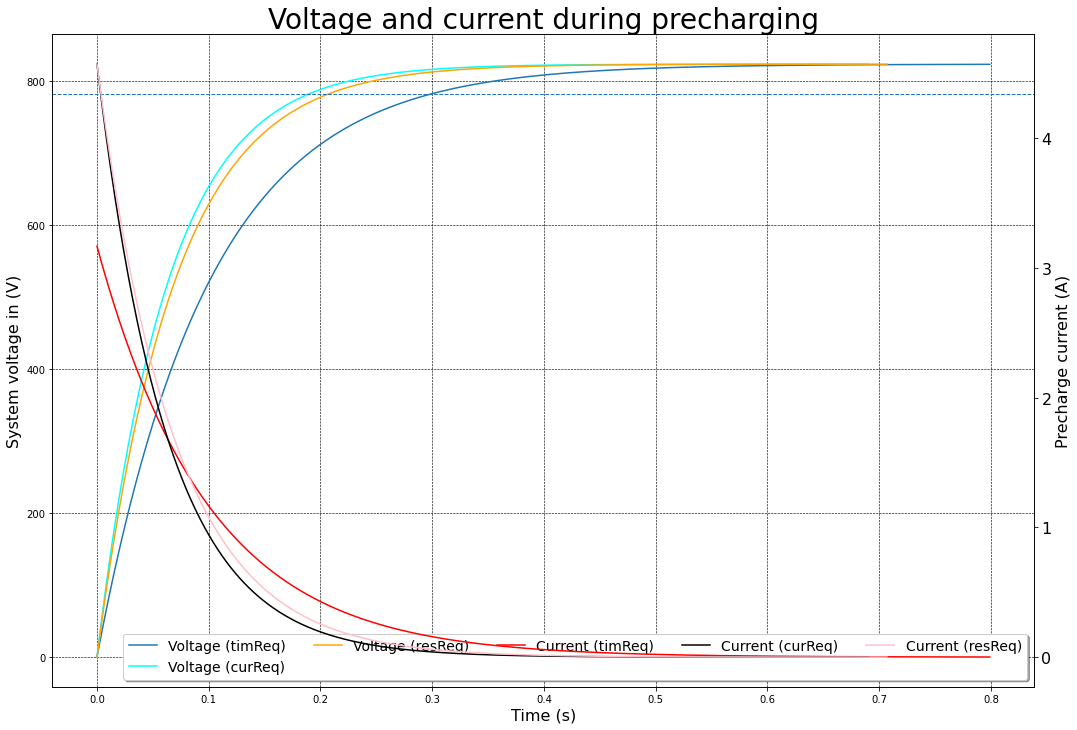

In [ ]:
timReqArrayPrechargeTime_s = np.arange(0.0, timReqPrechargeDuration_s + 0.5, 0.001)
curReqArrayPrechargeTime_s = np.arange(0.0, curReqPrechargeDuration_s + 0.5, 0.001)
resReqArrayPrechargeTime_s = np.arange(0.0, resReqPrechargeDuration_s + 0.5, 0.001)

# Arrays for precharging with timing requirement
timReqArrayCurrent_A = [(maximumBatteryVoltage_V/timReqPrechargeResistance_ohm) * math.exp(-(1/timReqTau_s) * time_step_s) for time_step_s in timReqArrayPrechargeTime_s]
timReqArrayVoltage_V = [maximumBatteryVoltage_V * (1 - math.exp(-(1/timReqTau_s)*time_step_s)) for time_step_s in timReqArrayPrechargeTime_s]

# Arrays for precharging with current requirement
curReqArrayCurrent_A = [(maximumBatteryVoltage_V/resReqPrechargeResistance_ohm) * math.exp(-(1/curReqTau_s) * time_step_s) for time_step_s in curReqArrayPrechargeTime_s]
curReqArrayVoltage_V = [maximumBatteryVoltage_V * (1 - math.exp(-(1/curReqTau_s)*time_step_s)) for time_step_s in curReqArrayPrechargeTime_s]

# Arrays for precharging with resistance requirement
resReqArrayCurrent_A = [(maximumBatteryVoltage_V/resReqPrechargeResistance_ohm) * math.exp(-(1/resReqTau_s) * time_step_s) for time_step_s in resReqArrayPrechargeTime_s]
resReqArrayVoltage_V = [maximumBatteryVoltage_V * (1 - math.exp(-(1/resReqTau_s)*time_step_s)) for time_step_s in resReqArrayPrechargeTime_s]

# plot data
p = []
fig, ax1 = plt.subplots(figsize=(17.6, 12.0))
p.extend(
    ax1.plot(
        timReqArrayPrechargeTime_s,
        timReqArrayVoltage_V,
        label="Voltage (timReq)",
        linewidth=1.5,
    )
)
p.extend(
    ax1.plot(
        curReqArrayPrechargeTime_s,
        curReqArrayVoltage_V,
        label="Voltage (curReq)",
        linewidth=1.5,
        color="cyan"
    )
)
p.extend(
    ax1.plot(
        resReqArrayPrechargeTime_s,
        resReqArrayVoltage_V,
        label="Voltage (resReq)",
        linewidth=1.5,
        color="orange"
    )
)


# add horizontal line at 95% system voltage -> at this voltage level we would close second main contactor
ax1.axhline(y=0.95*maximumBatteryVoltage_V, ls='--', lw=1)

ax2=ax1.twinx()

p.extend(
    ax2.plot(
        timReqArrayPrechargeTime_s,
        timReqArrayCurrent_A,
        label="Current (timReq)",
        linewidth=1.5,
        color="red",
    )
)
p.extend(
    ax2.plot(
        curReqArrayPrechargeTime_s,
        curReqArrayCurrent_A,
        label="Current (curReq)",
        linewidth=1.5,
        color="black",
    )
)
p.extend(
    ax2.plot(
        resReqArrayPrechargeTime_s,
        resReqArrayCurrent_A,
        label="Current (resReq)",
        linewidth=1.5,
        color="pink",
    )
)


ax1.set_ylabel("System voltage in (V)", fontsize=16)
ax2.set_ylabel("Precharge current (A)", fontsize=16)
ax1.set_xlabel("Time (s)", fontsize=16)

ax1.grid(axis="x", color="black", linestyle="dashed", linewidth=0.6, which="major")
ax1.grid(axis="y", color="black", linestyle="dashed", linewidth=0.6, which="major")

labs = [l.get_label() for l in p]
ax1.legend(
    p,
    labs,
    loc="lower right",
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={"size": 14},
)

ax1.set_title("Voltage and current during precharging", fontsize=28)
plt.tick_params(axis="both", which="major", labelsize="16")
plt.show()
    


Now we can calculate the losses in the precharge resistor as follows:

$P_{Precharge}(t) = \frac{U_{Precharge}^2}{R_{Precharge}} = \frac{(U_{Battery} - U_{System}(t))^2}{R_{Precharge}}$


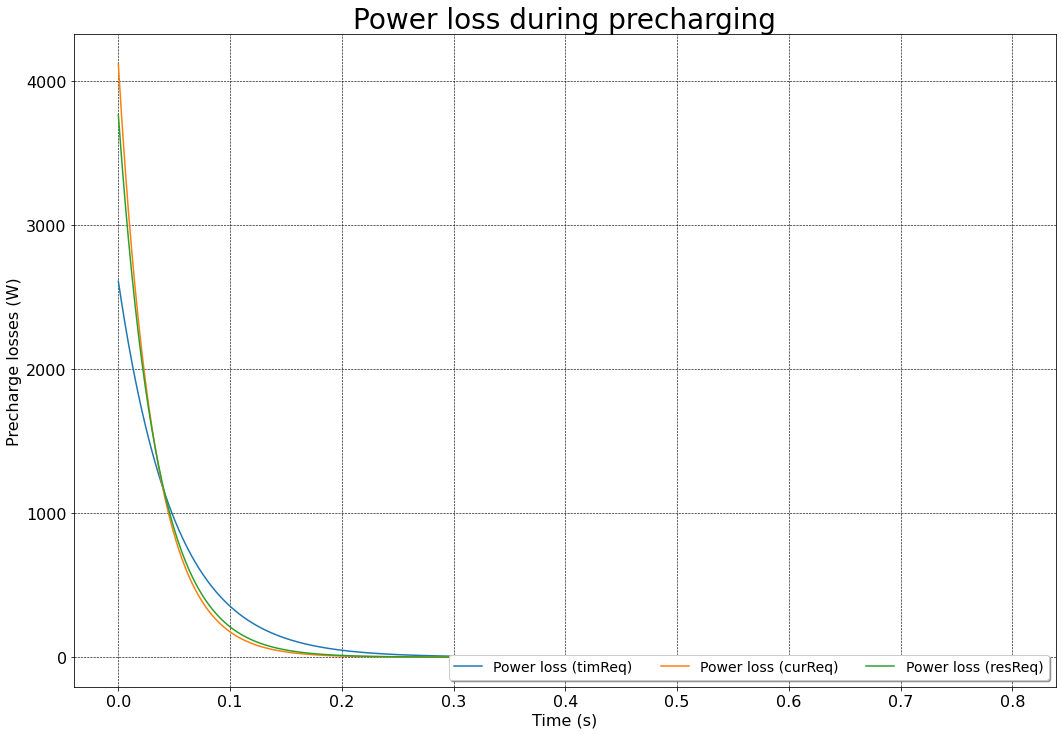

In [ ]:
# Minimum and maximum precharge losses
timReqArrayPower_W = [((maximumBatteryVoltage_V - systemVoltage_V)**2)/timReqPrechargeResistance_ohm for systemVoltage_V in timReqArrayVoltage_V]
curReqArrayPower_W = [((maximumBatteryVoltage_V - systemVoltage_V)**2)/curReqPrechargeResistance_ohm for systemVoltage_V in curReqArrayVoltage_V]
resReqArrayPower_W = [((maximumBatteryVoltage_V - systemVoltage_V)**2)/resReqPrechargeResistance_ohm for systemVoltage_V in resReqArrayVoltage_V]


# plot data
p = []
fig, ax1 = plt.subplots(figsize=(17.6, 12.0))
p.extend(
    ax1.plot(
        timReqArrayPrechargeTime_s,
        timReqArrayPower_W,
        label="Power loss (timReq)",
        linewidth=1.5,
    )
)
p.extend(
    ax1.plot(
        curReqArrayPrechargeTime_s,
        curReqArrayPower_W,
        label="Power loss (curReq)",
        linewidth=1.5,
    )
)
p.extend(
    ax1.plot(
        resReqArrayPrechargeTime_s,
        resReqArrayPower_W,
        label="Power loss (resReq)",
        linewidth=1.5,
    )
)

ax1.set_ylabel("Precharge losses (W)", fontsize=16)
ax1.set_xlabel("Time (s)", fontsize=16)

ax1.grid(axis="x", color="black", linestyle="dashed", linewidth=0.6, which="major")
ax1.grid(axis="y", color="black", linestyle="dashed", linewidth=0.6, which="major")

labs = [l.get_label() for l in p]
ax1.legend(
    p,
    labs,
    loc="lower right",
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={"size": 14},
)

ax1.set_title("Power loss during precharging", fontsize=28)
plt.tick_params(axis="both", which="major", labelsize="16")
plt.show()

Integrating these losses over the course of precharging gives us the amount of energy that the precharge resistor needs to sustain.

$E_{Precharge}(t) = P_{Precharge}(t) t$

The total energy loss is calculated as

$E_{Total} = \int_0^\infty P_{Precharge}(t)\mathrm{d}t$



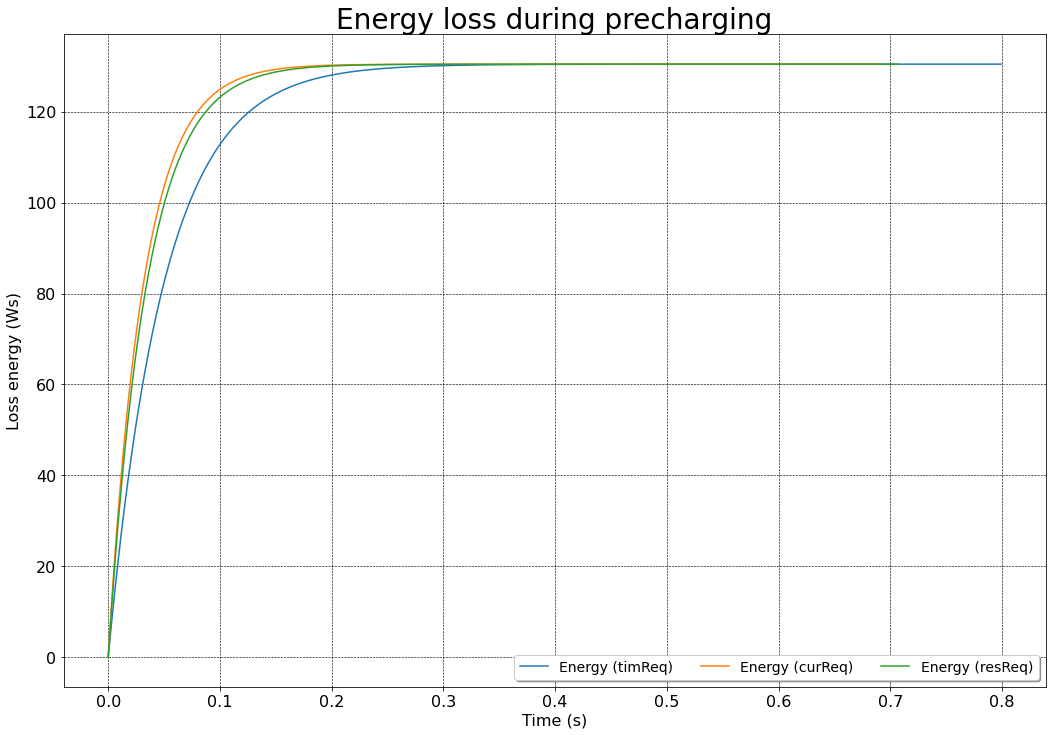

In [ ]:
timReqArrayEnergy_Ws = integrate.cumtrapz(timReqArrayPower_W, timReqArrayPrechargeTime_s, initial=0)
curReqArrayEnergy_Ws = integrate.cumtrapz(curReqArrayPower_W, curReqArrayPrechargeTime_s, initial=0)
resReqArrayEnergy_Ws = integrate.cumtrapz(resReqArrayPower_W, resReqArrayPrechargeTime_s, initial=0)

# plot data
p = []
fig, ax1 = plt.subplots(figsize=(17.6, 12.0))
p.extend(
    ax1.plot(
        timReqArrayPrechargeTime_s,
        timReqArrayEnergy_Ws,
        label="Energy (timReq)",
        linewidth=1.5,
    )
)
p.extend(
    ax1.plot(
        curReqArrayPrechargeTime_s,
        curReqArrayEnergy_Ws,
        label="Energy (curReq)",
        linewidth=1.5,
    )
)
p.extend(
    ax1.plot(
        resReqArrayPrechargeTime_s,
        resReqArrayEnergy_Ws,
        label="Energy (resReq)",
        linewidth=1.5,
    )
)

ax1.set_ylabel("Loss energy (Ws)", fontsize=16)
ax1.set_xlabel("Time (s)", fontsize=16)

ax1.grid(axis="x", color="black", linestyle="dashed", linewidth=0.6, which="major")
ax1.grid(axis="y", color="black", linestyle="dashed", linewidth=0.6, which="major")

labs = [l.get_label() for l in p]
ax1.legend(
    p,
    labs,
    loc="lower right",
    fancybox=True,
    shadow=True,
    ncol=5,
    prop={"size": 14},
)

ax1.set_title("Energy loss during precharging", fontsize=28)
plt.tick_params(axis="both", which="major", labelsize="16")
plt.show()